In [63]:
import pandas as pd
import numpy as np

#data viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style


In [3]:
# Read the data
df = pd.read_csv(r'C:\Users\HP\Documents\Rakamin\Homework Week 7\Kaggle Bank\bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# View the data
print(df.info())
print('=======================')
print(df.describe())
print('=======================')
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
               age       balance          day     duration     campaign  \
count  4521.000000 

There are 16 input variable includes qualitative and quantitative attributes of the customer.<br>
**'Y'** Variable that has a **'yes'** value means the customer makes a deposit, the **'No'** value mean the customer doesn't deposit

## Number of customers by job category

In [12]:
# Create table that show number of customers per job
df['job'].value_counts().reset_index()
df_job

,index,job
0,management,969
1,blue-collar,946
2,technician,768
3,admin.,478
4,services,417
5,retired,230
6,self-employed,183
7,entrepreneur,168
8,unemployed,128
9,housemaid,112


Text(0.5, 1.0, 'Number of Customers by Job')

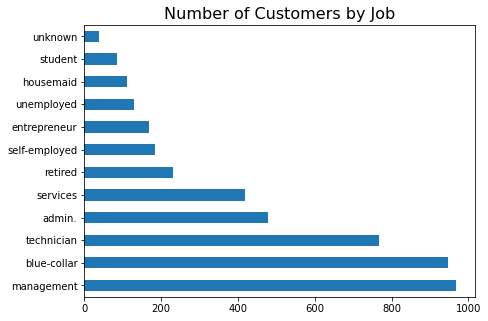

In [9]:
plt.figure(figsize=(7,5))
df['job'].value_counts().plot(kind='barh'), 
plt.title('Number of Customers by Job', fontsize=16)

Management job category is the most number of customer with 969 customers, followed by blue-collar that has 946 customers and technician with 768 customers.

### Who are the most campaign receiver per Job

In [70]:
# Grouping the data by the job variable
dfg_job = df.groupby('job').sum().sort_values(by='campaign',ascending=False).reset_index()
dfg_job

,job,age,balance,day,duration,campaign,pdays,previous
0,management,39284,1712154,15751,252460,2881,39698,532
1,blue-collar,37988,1026563,14646,263141,2693,39345,467
2,technician,30313,1022205,12429,193673,2098,30156,443
3,admin.,18968,586380,7803,112172,1258,23897,308
4,services,16084,460350,6470,109457,1177,15167,185
5,self-employed,7586,254811,2961,48335,600,5171,108
6,retired,14230,533414,3578,65701,567,8067,136
7,entrepreneur,7058,276381,2563,47960,435,5422,72
8,unemployed,5236,139446,2060,38562,343,4688,62
9,housemaid,5302,233386,1713,32775,280,2957,40


<function matplotlib.pyplot.show(close=None, block=None)>

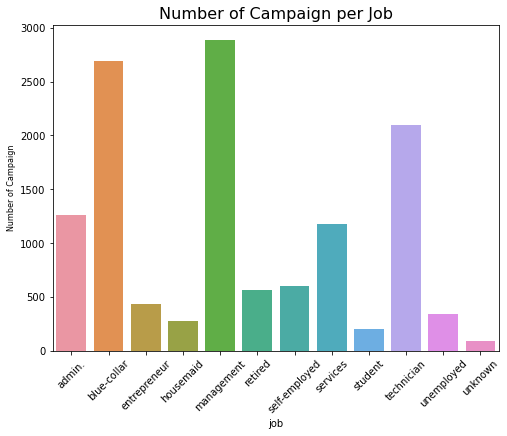

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(x='job',y='campaign',data=dfg_job)
plt.xticks(rotation = 45)
plt.title('Number of Campaign per Job', fontsize=16)
plt.ylabel('Number of Campaign', fontsize=8)
plt.show

Most campaigns are given to the customer who works in management, the second one is blue-collar, and the third one is the technician. The number of campaigns that given is directly proportional to the number of customers in job category.

### Which job category has the most and the least number of customers making deposits after given the campaign

In [41]:
# Grouping by'Y' variables that has 'Yes' values
dfg_yes = df[df.y=='yes']
dfg_yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
33,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
34,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
36,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


Text(0.5, 1.0, 'Number of Deposit Customer per Job')

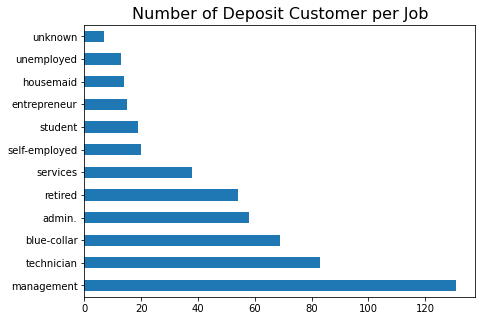

In [62]:
plt.figure(figsize=(7,5))
dfy_yes['job'].value_counts().plot(kind='barh'), 
plt.title('Number of Deposit Customer per Job', fontsize=16)

From the output above, we can see from the job category that the most customer who deposit after the campaign are given is from the management.

### The Job Category Master Table

In [13]:
df['job'].value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'entrepreneur', 'unemployed', 'housemaid',
       'student', 'unknown'],
      dtype='object')

In [24]:
# Create new table of job category
total_customer_num = []
yes_num = []
no_num = []
title = []

for i in df['job'].value_counts().index:
    df_job= pd.DataFrame()
    df_job= df[df['job']==i]
    title.append(i)
    total_customer_num.append(df_job.shape[0])
    yes_num.append(df_job[df_job['y']=='yes'].count()['y'])
    no_num.append(df_job[df_job['y']=='no'].count()['y'])
df_job = pd.DataFrame()
df_job['job title']=title
df_job['total']=total_customer_num
df_job['yes']=yes_num
df_job['no']=no_num
df_job

,job title,total,yes,no
0,management,969,131,838
1,blue-collar,946,69,877
2,technician,768,83,685
3,admin.,478,58,420
4,services,417,38,379
5,retired,230,54,176
6,self-employed,183,20,163
7,entrepreneur,168,15,153
8,unemployed,128,13,115
9,housemaid,112,14,98


<function matplotlib.pyplot.show(close=None, block=None)>

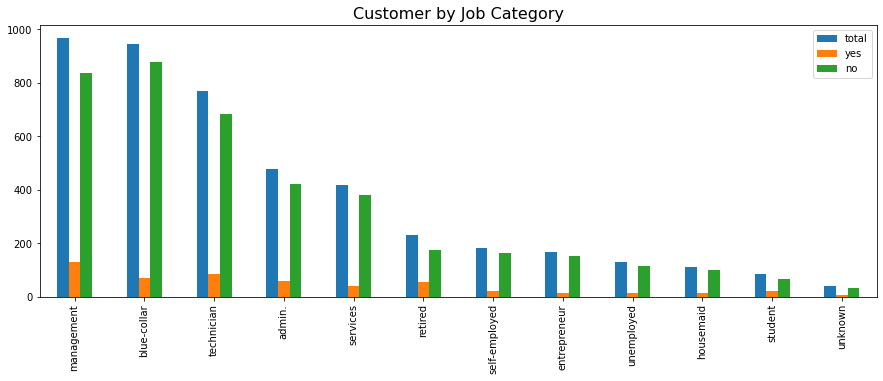

In [45]:
df_job.plot(kind='bar',figsize=(15,5))
plt.title('Customer by Job Category',fontsize=16)
labels=df_job['job title']
pos=np.arange(0,12)
plt.xticks(pos,labels)
plt.show

There's an interesting insight from the output above, Technician job has more **Yes** value total customer than the blue-collar even though the blue-collar has more total customers. Also the blue-collar has more **No** value total customer compared to the Management even though Management has more total customers.

### Deposite Rate by Job Category

In [79]:
# Create new table for yes and no rate percentage by job category
df_job_deposit_rate = pd.DataFrame()
df_job_deposit_rate['job title']=title
df_job_deposit_rate['yes rate']=round((df_job['yes']/df_job['total'])*100,2)
df_job_deposit_rate['no rate']=round((df_job['no']/df_job['total'])*100,2)
df_job_deposit_rate.sort_values(by='yes rate',ascending=False)

,job title,yes rate,no rate
5,retired,23.48,76.52
10,student,22.62,77.38
11,unknown,18.42,81.58
0,management,13.52,86.48
9,housemaid,12.50,87.50
3,admin.,12.13,87.87
6,self-employed,10.93,89.07
2,technician,10.81,89.19
8,unemployed,10.16,89.84
4,services,9.11,90.89


<function matplotlib.pyplot.show(close=None, block=None)>

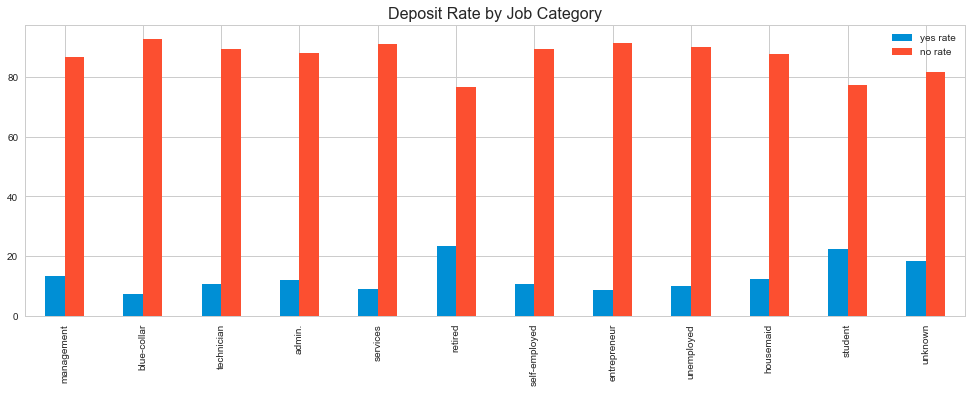

In [85]:
style.use('seaborn-whitegrid')
df_job_deposit_rate.plot(kind='bar',figsize=(15,5))
labels=df_job_deposite_rate['job title']
pos = np.arange(0,12)
plt.xticks(pos,labels)
plt.title('Deposit Rate by Job Category',fontsize=16)
plt.show

**Findings:**<br>
**A.** Retired has the biggest yes rate, the second one is the student<br>
**B.** Blue-collar, Entrepreneur and Service has no rate more than 90%<br>
**C.** Management, Blue-collar, and Technician is the top 3 campaign receiver<br>
**D.** Housemaid, Student, and Unknown is the bottom 3 campaign receiver